## Sobel filter the image

**(a) Using cv2.filter2D to Sobel Filter the Image**

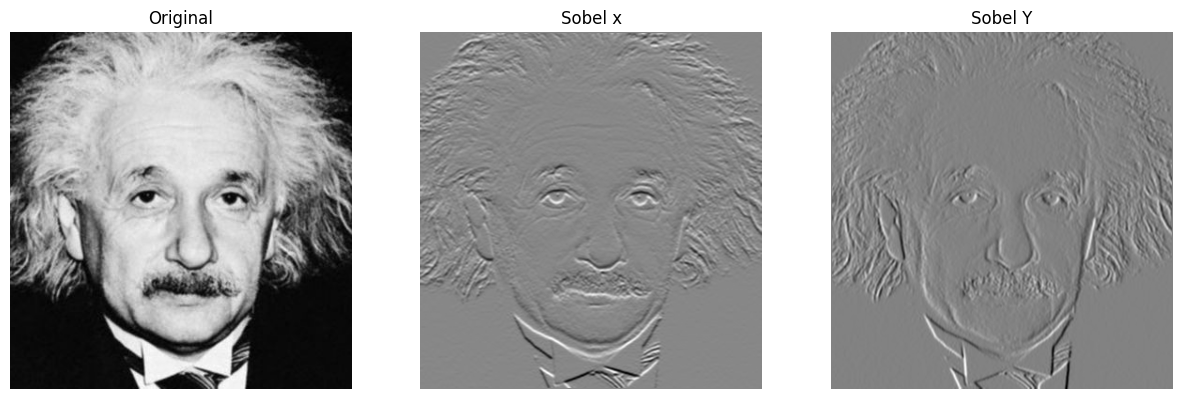

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the Einstein image in grayscale
image_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\einstein.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

g_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)
g_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g_x + 255, cmap='gray') # increase brightness
ax[1].set_title('Sobel x')
ax[1].axis('off')
ax[2].imshow(g_y + 255, cmap='gray') # increase brightness
ax[2].set_title('Sobel Y')
ax[2].axis('off')
plt.show()

**(b) My own code to Sobel filter the image**

In [4]:
def apply_sobel_filter(image, kernel):
    """
    Apply a Sobel filter to an image using a given kernel.
    
    Parameters:
    image (numpy array): The input image.
    kernel (numpy array): The Sobel kernel.
    
    Returns:
    numpy array: The filtered image.
    """
    height, width = image.shape
    filtered_image = np.zeros_like(image)  # Create an empty output image
    
    # Pad the input image with a 1-pixel border (edge handling)
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
    
    # Convolve the image with the kernel
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            region = padded_image[i - 1:i + 2, j - 1:j + 2]  # Extract 3x3 region
            filtered_image[i - 1, j - 1] = np.sum(region * kernel)
    
    return filtered_image

# Manually apply Sobel filters
# Convert color image to grayscale
gray_image = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)

# Manually apply Sobel filters
manual_sobel_x = apply_sobel_filter(gray_image, horizontal_kernel_row)
manual_sobel_y = apply_sobel_filter(gray_image, vertical_kernel_row)

# Display the manually filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(manual_sobel_x, cmap='gray')
plt.title('Manual Sobel Filter - Horizontal Edges')

plt.subplot(1, 2, 2)
plt.imshow(manual_sobel_y, cmap='gray')
plt.title('Manual Sobel Filter - Vertical Edges')

plt.show()

NameError: name 'color' is not defined

**(c) Using the Property**

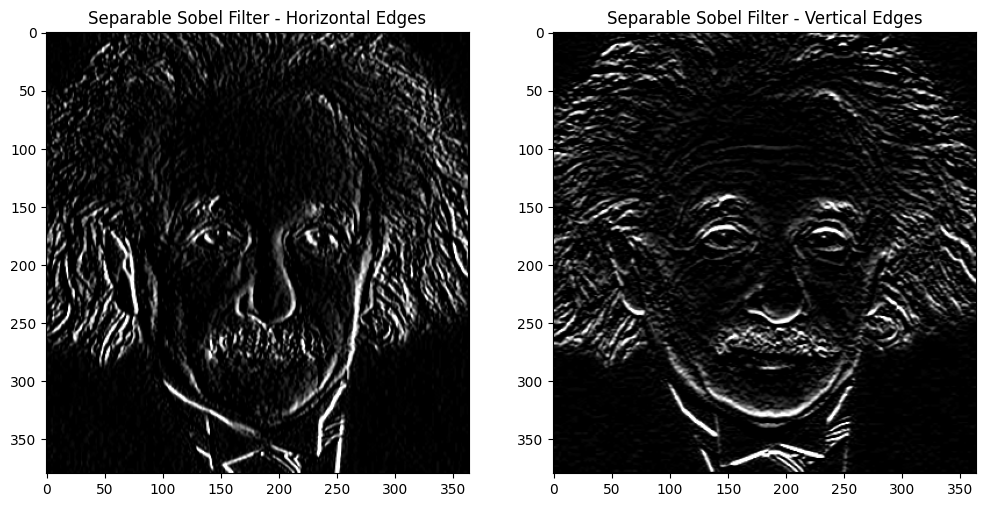

In [21]:
# Load the Einstein image in color
color_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

horizontal_kernel_row = np.array([[1, 0, -1]])  # 1x3
horizontal_kernel_col = np.array([[1], [2], [1]])  # 3x1

# Apply separable Sobel filtering for horizontal edges
separable_horizontal_edges = cv2.filter2D(color_image, -1, horizontal_kernel_row)
separable_horizontal_edges = cv2.filter2D(separable_horizontal_edges, -1, horizontal_kernel_col)

# Sobel filter split into two 1D filters for vertical edge detection
vertical_kernel_row = np.array([[1], [0], [-1]])  # 3x1
vertical_kernel_col = np.array([[1, 2, 1]])  # 1x3

# Apply separable Sobel filtering for vertical edges
separable_vertical_edges = cv2.filter2D(color_image, -1, vertical_kernel_row)
separable_vertical_edges = cv2.filter2D(separable_vertical_edges, -1, vertical_kernel_col)

# Display the separable Sobel filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(separable_horizontal_edges, cmap='gray')
plt.title('Separable Sobel Filter - Horizontal Edges')

plt.subplot(1, 2, 2)
plt.imshow(separable_vertical_edges, cmap='gray')
plt.title('Separable Sobel Filter - Vertical Edges')

plt.show()